In [1]:
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt as sqrt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
import statsmodels.api as sm

In [2]:
data=pd.read_csv('./datasets/ceda/dataset.csv',index_col='DATE',parse_dates=True)
future=pd.read_csv('./future.csv',index_col='DATE',parse_dates=True)

In [3]:
#Data Split
data.index.freq='M'
point=240
train=data.iloc[:-point]
test=data.iloc[-point:]

In [4]:
def pff(result, d, col):
  fig, ax = plt.subplots(figsize=(18, 6))
  ax.plot(data[col], label='Observed')

  # plot the curve fitted on train set
  train_pred = result.predict(start=train.index[d], end=train.index[-1])

  ax.plot(train.index[d:], train_pred, color='green', label='Fitted')

  # forecast the test set
  prediction_result = result.get_forecast(point)
  #conf_int = prediction_result.conf_int()
  #lower, upper = conf_int[f'lower {col}'], conf_int[f'upper {col}']
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label='Forecast')
  #ax.fill_between(test.index, \
                  #lower, upper, \
                  #color='red', alpha=0.3)
  ax.legend(loc='upper left')

In [5]:
def rmse(result, col, logflag):
  forecast = result.forecast(point)
  if logflag:
    forecast = np.exp(forecast)
  
  t = test[col]
  y = forecast
  return np.sqrt(np.mean((t - y)**2))

In [6]:
sarmodel=sm.tsa.statespace.SARIMAX(train['TEMPERATURE'],order=(12,0,3),seasonal_order=(0,0,3,12),
                                   enforce_stationarity=False,enforce_invertibility=False)
sarresult=sarmodel.fit()

C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


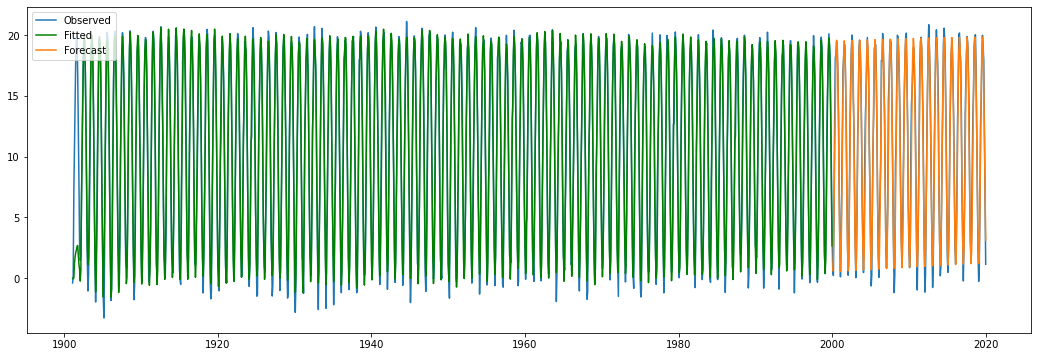

In [7]:
pff(sarresult,0,'TEMPERATURE')

In [8]:
rmse(sarresult,'TEMPERATURE',False)

1.1295720711270814

In [16]:
r2_score(test['TEMPERATURE'],sarresult.forecast(point))

0.973224691493551

In [27]:
def pff_new(result, d, col):
    fig, ax = plt.subplots(figsize=(18, 6))
    ax.plot(test[col], label='Observed')
    # forecast the test set
    prediction_result = result.get_forecast(point)
    forecast = prediction_result.predicted_mean
    ax.plot(test.index, forecast, label='Forecast')
    ax.legend(loc='upper left')
    ax.set_xlabel('Time')
    ax.set_ylabel('Temperature')
    #ax.set_xticks('DATE')

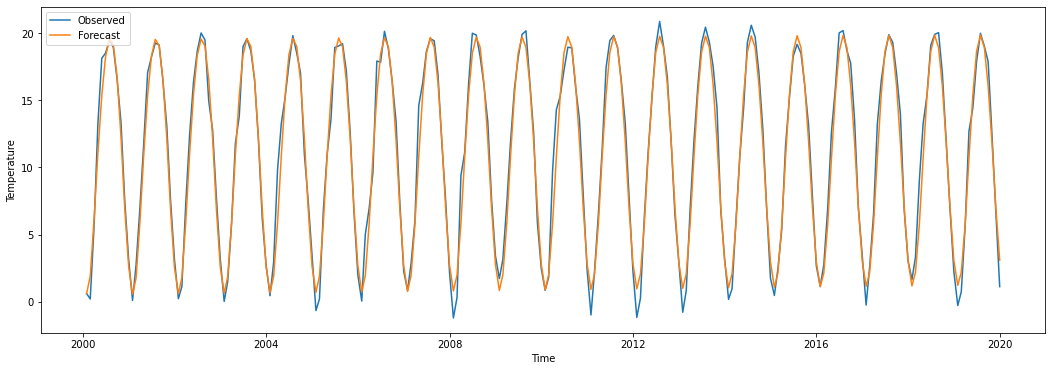

In [28]:
pff_new(sarresult,0,'TEMPERATURE')

In [91]:
def pff_future(result, d, col):
    fig, ax = plt.subplots(figsize=(18, 6))
    #ax.plot(test[col], label='Observed')
    prediction_result = result.get_forecast(len(future))
    forecast = prediction_result.predicted_mean
    future[col]=forecast
    ax.plot(future.index, forecast, label='Forecast')
    ax.legend(loc='upper left')
    ax.set_xlabel('Time')
    ax.set_ylabel('Temperature')
    #ax.set_xticks('DATE')

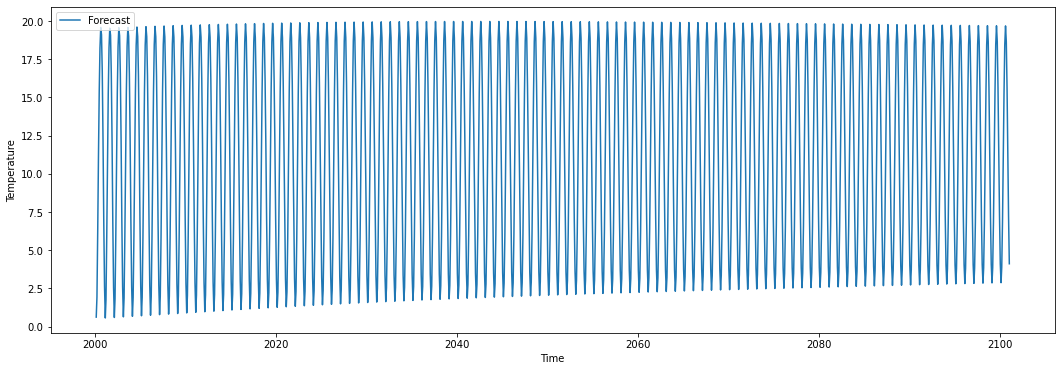

In [92]:
pff_future(sarresult,0,'TEMPERATURE')

In [17]:
sarmodel = sm.tsa.statespace.SARIMAX(train['AVG MIN TEMPERATURE'],order=(4,1,3),seasonal_order=(0,1,3,12),
                                   enforce_stationarity=False,enforce_invertibility=False)
sarresult_min=sarmodel.fit()

C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


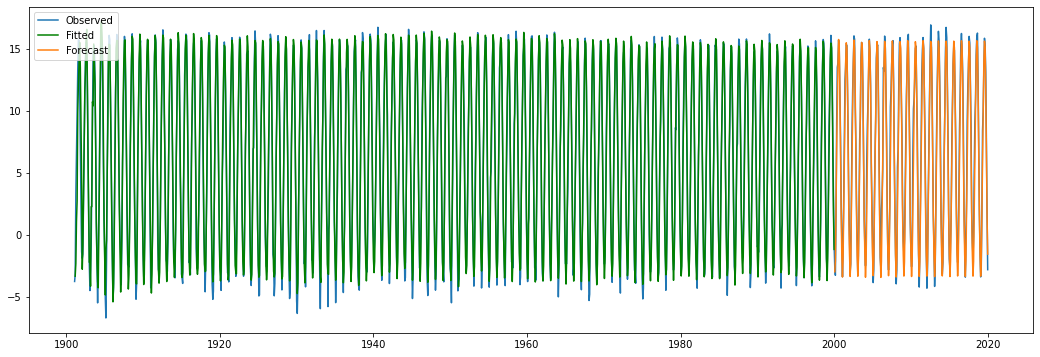

In [18]:
pff(sarresult_min,1,'AVG MIN TEMPERATURE')

In [19]:
rmse(sarresult_min,'AVG MIN TEMPERATURE',False)

1.150438949125187

In [20]:
r2_score(test['AVG MIN TEMPERATURE'],sarresult_min.forecast(point))

0.969821388269209

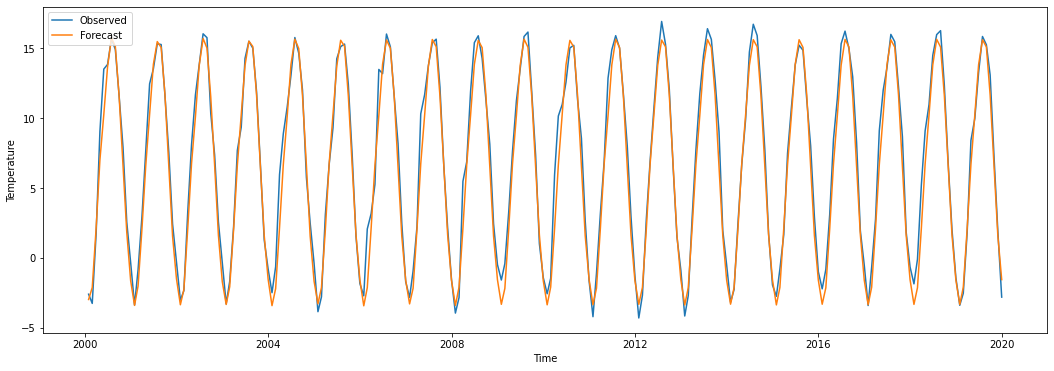

In [85]:
pff_new(sarresult_min,1,'AVG MIN TEMPERATURE')

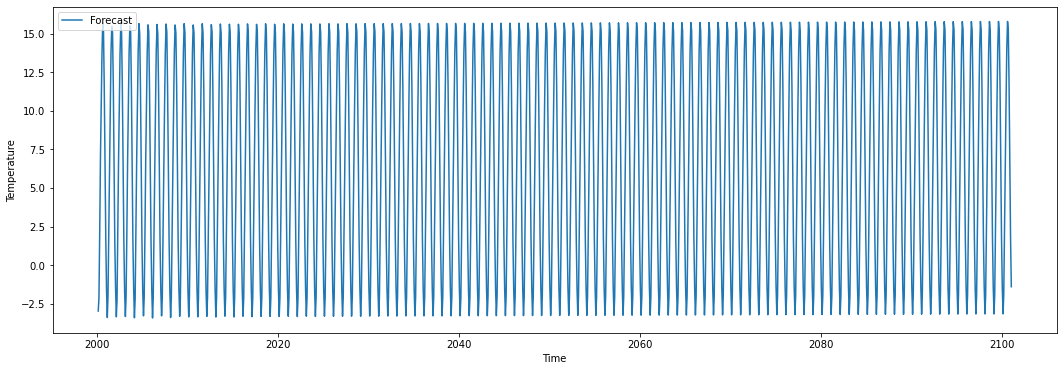

In [93]:
pff_future(sarresult_min,1,'AVG MIN TEMPERATURE')

In [21]:
sarmodel = sm.tsa.statespace.SARIMAX(train['AVG MAX TEMPERATURE'],order=(12,1,3),seasonal_order=(0,1,3,12),
                                   enforce_stationarity=False,enforce_invertibility=False)
sarresult_max=sarmodel.fit()

C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1.1514119087518178

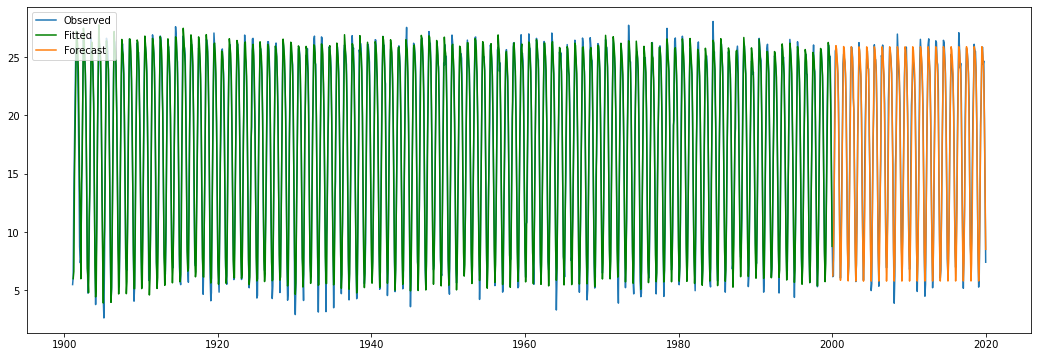

In [22]:
pff(sarresult_max,1,'AVG MAX TEMPERATURE')
rmse(sarresult_max,'AVG MAX TEMPERATURE',False)

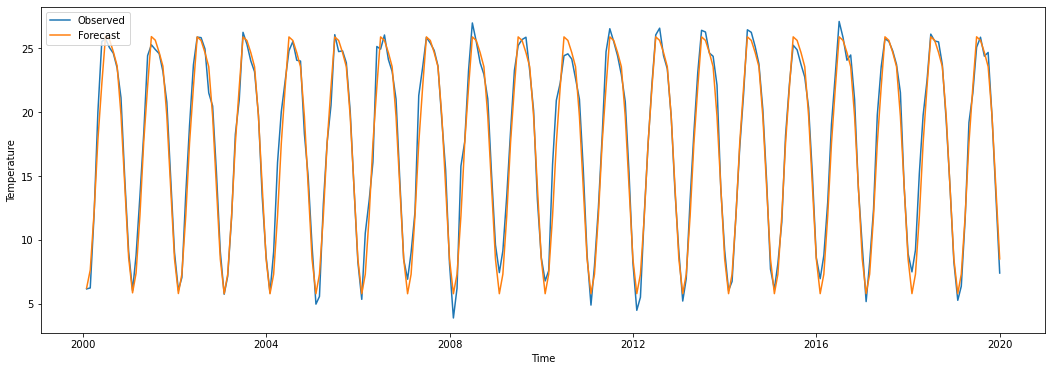

In [96]:
pff_new(sarresult_max,1,'AVG MAX TEMPERATURE')

In [23]:
r2_score(test['AVG MAX TEMPERATURE'],sarresult_max.forecast(point))

0.9737267447858031

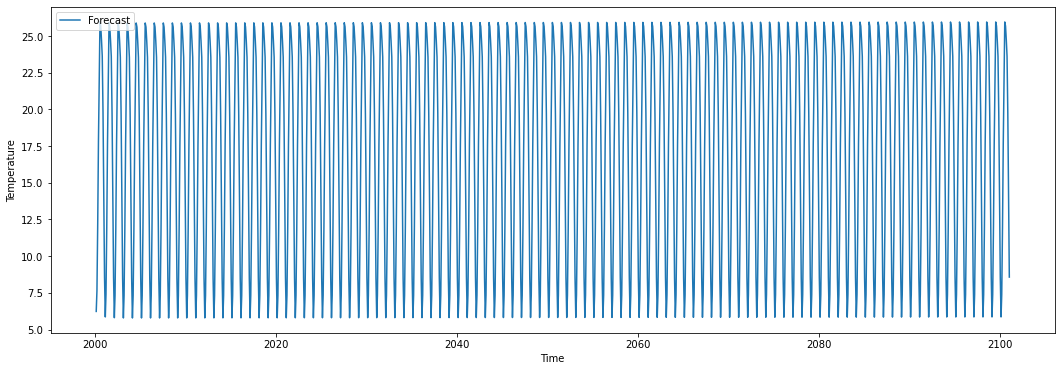

In [97]:
pff_future(sarresult_max,1,'AVG MAX TEMPERATURE')

In [98]:
sarresult_max.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                 AVG MAX TEMPERATURE   No. Observations:                 1188
Model:             SARIMAX(12, 1, 3)x(0, 1, 3, 12)   Log Likelihood               -1697.140
Date:                             Sun, 19 Sep 2021   AIC                           3432.280
Time:                                     21:53:39   BIC                           3527.933
Sample:                                 01-31-1901   HQIC                          3468.411
                                      - 12-31-1999                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2768      0.598      0.463      0.643      -0.894       1.448
ar.L2          0.1823      0.493      0.370      0.711      -0.783       1.148
ar.L3          0.0024      0.118      0.020      0.984      -0.229       0.234
ar.L4          0.0405      0.045      0.908      0.364      -0.047       0.128
ar.L5          0.0407      0.052      0.777      0.437      -0.062       0.143
ar.L6          0.0122      0.054      0.226      0.821      -0.093       0.118
ar.L7         -0.0488      0.047     -1.038      0.299      -0.141       0.043
ar.L8          0.0111      0.042      0.268      0.789      -0.070       0.093
ar.L9         -0.0148      0.039     -0.381      0.703      -0.091       0.062
ar.L10         0.0165      0.033      0.501      0.617      -0.048       0.081
ar.L11        -0.0031      0.033     -0.097      0.923      -0.067       0.061
ar.L12         0.0455      0.106      0.430      0.667      -0.162       0.253
ma.L1         -1.0380      0.598     -1.735      0.083      -2.211       0.135
ma.L2         -0.1544      0.728     -0.212      0.832      -1.582       1.273
ma.L3          0.1930      0.488      0.396      0.692      -0.763       1.149
ma.S.L12      -1.0661      0.108     -9.900      0.000      -1.277      -0.855
ma.S.L24       0.0383      0.112      0.343      0.731      -0.180       0.257
ma.S.L36      -0.0221      0.029     -0.774      0.439      -0.078       0.034
sigma2         1.0313      0.048     21.606      0.000       0.938       1.125
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                34.52
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.09
Prob(H) (two-sided):                  0.68   Kurtosis:                         3.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [99]:
sarresult_min.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                AVG MIN TEMPERATURE   No. Observations:                 1188
Model:             SARIMAX(4, 1, 3)x(0, 1, 3, 12)   Log Likelihood               -1633.229
Date:                            Sun, 19 Sep 2021   AIC                           3288.459
Time:                                    21:54:51   BIC                           3343.837
Sample:                                01-31-1901   HQIC                          3309.376
                                     - 12-31-1999                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3380      0.028    -11.885      0.000      -0.394      -0.282
ar.L2         -0.8300      0.031    -26.413      0.000      -0.892      -0.768
ar.L3          0.2401      0.031      7.703      0.000       0.179       0.301
ar.L4          0.0164      0.029      0.568      0.570      -0.040       0.073
ma.L1         -0.4068      0.252     -1.613      0.107      -0.901       0.087
ma.L2          0.4224      0.615      0.687      0.492      -0.783       1.628
ma.L3         -0.9901      0.857     -1.156      0.248      -2.669       0.689
ma.S.L12      -0.9496      0.034    -27.547      0.000      -1.017      -0.882
ma.S.L24      -0.0780      0.036     -2.198      0.028      -0.148      -0.008
ma.S.L36      -0.0070      0.028     -0.249      0.803      -0.062       0.048
sigma2         0.9463      0.815      1.161      0.245      -0.651       2.543
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                28.65
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                             0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [100]:
sarresult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         TEMPERATURE   No. Observations:                 1188
Model:             SARIMAX(12, 0, 3)x(0, 0, 3, 12)   Log Likelihood               -1702.036
Date:                             Sun, 19 Sep 2021   AIC                           3442.073
Time:                                     21:55:30   BIC                           3537.942
Sample:                                 01-31-1901   HQIC                          3478.265
                                      - 12-31-1999                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1664      0.031      5.432      0.000       0.106       0.226
ar.L2         -0.0027      0.023     -0.114      0.909      -0.049       0.043
ar.L3         -0.0349      0.024     -1.449      0.147      -0.082       0.012
ar.L4         -0.0410      0.021     -1.998      0.046      -0.081      -0.001
ar.L5          0.0383      0.021      1.825      0.068      -0.003       0.080
ar.L6          0.0415      0.023      1.793      0.073      -0.004       0.087
ar.L7         -0.0547      0.021     -2.581      0.010      -0.096      -0.013
ar.L8         -0.0171      0.018     -0.957      0.339      -0.052       0.018
ar.L9          0.0394      0.017      2.281      0.023       0.006       0.073
ar.L10         0.0066      0.016      0.406      0.685      -0.025       0.039
ar.L11         0.0540      0.017      3.139      0.002       0.020       0.088
ar.L12         0.8044      0.030     26.454      0.000       0.745       0.864
ma.L1         -0.0017      0.039     -0.043      0.965      -0.078       0.075
ma.L2         -0.0102      0.035     -0.291      0.771      -0.079       0.058
ma.L3          0.1350      0.037      3.661      0.000       0.063       0.207
ma.S.L12      -0.6089      0.039    -15.677      0.000      -0.685      -0.533
ma.S.L24      -0.0774      0.028     -2.742      0.006      -0.133      -0.022
ma.S.L36       0.0160      0.026      0.619      0.536      -0.035       0.066
sigma2         1.0664      0.038     27.721      0.000       0.991       1.142
===================================================================================
Ljung-Box (L1) (Q):                  14.12   Jarque-Bera (JB):                41.14
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.06
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [104]:
future.to_csv('./future.csv')

In [2]:
future=pd.read_csv('./future_cld_monthly.csv',index_col='DATE',parse_dates=True)

In [3]:
future.reset_index(inplace=True)
future['MONTH'] = future['DATE'].dt.month
future['DATE'] = future['DATE'].dt.year
future.rename(columns={'DATE':'YEAR'},inplace=True)
future.set_index('YEAR',inplace=True)
future.head()

,CLOUD COVER,MONTH
YEAR,,
2000,50.655201,1
2000,54.670235,2
2000,56.360528,3
2000,48.588010,4
2000,41.501422,5


In [5]:
future_temp=pd.DataFrame()
future_temp['JAN']=future['CLOUD COVER'].loc[future["MONTH"]==1]


In [6]:
months=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
i=0
for key in months:
    i+=1
    future_temp[key]=future['CLOUD COVER'].loc[future["MONTH"]==i]

In [7]:
future_temp.to_csv('./future_cld_new.csv')

In [15]:
i=0
for key in months:
    i=i+1
    future_temp[key]=future['AVG MIN TEMPERATURE'].loc[future["MONTH"]==i]
future_temp.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
YEAR,,,,,,,,,,,,
2000,-2.978097,-2.120939,2.138785,6.993095,10.248230,13.666723,15.740746,15.119607,11.584764,6.670577,1.836041,-1.635697
2001,-3.400627,-2.017272,2.074831,6.568986,10.285347,13.847963,15.475917,15.056851,11.725615,6.472983,1.532722,-1.493914
2002,-3.354060,-2.262535,2.138363,6.747124,10.102139,13.764904,15.697594,15.013359,11.524115,6.621113,1.625639,-1.707347
2003,-3.333483,-2.066505,2.009225,6.633406,10.299056,13.768858,15.507305,15.123699,11.652847,6.444313,1.605815,-1.517286
2004,-3.417690,-2.199550,2.173286,6.675194,10.119347,13.836015,15.650392,14.981050,11.599374,6.620139,1.562782,-1.659950


In [16]:
future_temp.to_csv('./future_tmn_monthly.csv')

In [17]:
i=0
for key in months:
    i=i+1
    future_temp[key]=future['AVG MAX TEMPERATURE'].loc[future["MONTH"]==i]
future_temp.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
YEAR,,,,,,,,,,,,
2000,6.234174,7.646703,12.196440,17.840468,22.199478,25.991908,25.682513,24.723776,23.630765,19.783308,14.253461,8.592072
2001,5.858400,7.399313,11.947140,17.649712,22.029584,25.914541,25.636266,24.675671,23.596502,19.701756,14.205179,8.541933
2002,5.804253,7.326152,11.890961,17.578531,21.979248,25.892590,25.614811,24.663325,23.556655,19.665957,14.175744,8.506475
2003,5.789598,7.314250,11.879621,17.569118,21.971384,25.887975,25.611615,24.660644,23.553558,19.662819,14.173253,8.503916
2004,5.787937,7.312914,11.878546,17.568342,21.970853,25.887743,25.611613,24.660757,23.553757,19.663063,14.173577,8.504275


In [18]:
future_temp.to_csv('./future_tmx_monthly.csv')